__수치 예측을 위한 데이터셋 생성을 하고, 선형회귀를 위한 가장 간단한 퍼셉트론 신경망 모델부터 깊은 다층퍼셉트론 신경망 모델까지 구성 및 학습해보기__

### 1. 데이터셋 준비

In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
# 데이터셋 생성

x_train = np.random.random((1000, 1))  # (1000, 1) shape의 0~1사이의 난수
y_train = x_train * 2 + np.random.random((1000, 1)) / 3.0
x_test = np.random.random((100, 1))
y_test = x_test * 2 + np.random.random((100, 1)) / 3.0

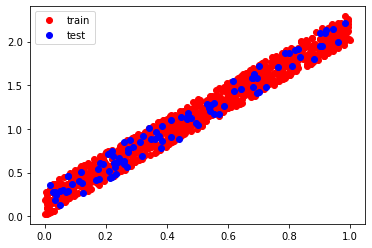

In [10]:
# 데이터셋 확인

plt.plot(x_train, y_train, 'ro')  # 'ro' : red로 o표시
plt.plot(x_test, y_test, 'bo')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### 2. 레이어 준비
- input data, Labels
- Dense
- relu

### 3. 모델 준비
#### 1) 선형 회귀 모델
- y = w * X + b
- want : w, b
<img src='img/4_1_1.png' width='350'>

In [23]:
# 공식

# w = np.cov(X, Y, bias=1)[0, 1] / np.var(X) 
# b = np.average(Y) - w * np.average(X)

In [28]:
from sklearn.metrics import mean_squared_error
import random

In [29]:
# 1. 전처리

x_train = x_train.reshape(1000, )
y_train = y_train.reshape(1000, )
x_test = x_test.reshape(100, )
y_test = y_test.reshape(100, )

In [30]:
# 2. 모델 구성하기

w = np.cov(x_train, y_train, bias=1)[0, 1] / np.var(x_train)
   # bias는 정규화할지(1/T) 말지(0/F), [0, 1] 해주는 이유는 공분산 행렬 반환해서
b = np.average(y_train) - w * np.average(x_train)

w, b

(1.98457992684777, 0.17548602508830646)

In [31]:
# 3. 모델 평가하기

y_predict = w * x_test + b
mse = mean_squared_error(y_test, y_predict)
print('mse : ' + str(mse))

mse : 0.008639391417066038


#### 2) 퍼셉트론 신경망 모델

In [25]:
# 만드려는 모델

# model = Sequential()
# model.add(Dense(1, input_dim=1))

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [36]:
# 1. 데이터 생성

# x_train = np.random.random((1000, 1))  # (1000, 1) shape의 0~1사이의 난수
# y_train = x_train * 2 + np.random.random((1000, 1)) / 3.0
# x_test = np.random.random((100, 1))
# y_test = x_test * 2 + np.random.random((100, 1)) / 3.0

In [41]:
# 2. 모델 구성

model = Sequential()
model.add(Dense(1, input_dim=1))

In [42]:
# 3. 모델 학습과정 설정

model.compile(optimizer='rmsprop', loss='mse')

In [43]:
# 4. 모델 학습시키기

hist = model.fit(x_train, y_train, epochs=50, batch_size=64)
w, b = model.get_weights()

w, b

Epoch 1/50
16/16 [==============================] - 0s 1ms/step - loss: 0.6859
Epoch 2/50
16/16 [==============================] - 0s 1ms/step - loss: 0.6416
Epoch 3/50
16/16 [==============================] - 0s 1ms/step - loss: 0.6041
Epoch 4/50
16/16 [==============================] - 0s 1ms/step - loss: 0.5691
Epoch 5/50
16/16 [==============================] - 0s 1ms/step - loss: 0.5351
Epoch 6/50
16/16 [==============================] - 0s 1ms/step - loss: 0.5025
Epoch 7/50
16/16 [==============================] - 0s 1ms/step - loss: 0.4713
Epoch 8/50
16/16 [==============================] - 0s 989us/step - loss: 0.4410
Epoch 9/50
16/16 [==============================] - 0s 1ms/step - loss: 0.4115
Epoch 10/50
16/16 [==============================] - 0s 1ms/step - loss: 0.3832
Epoch 11/50
16/16 [==============================] - 0s 1ms/step - loss: 0.3564
Epoch 12/50
16/16 [==============================] - 0s 1ms/step - loss: 0.3307
Epoch 13/50
16/16 [============================

(array([[1.5564958]], dtype=float32), array([0.40111178], dtype=float32))

#### 3) 다층퍼셉트론 신경망 모델

In [44]:
# 만드려는 모델

# model = Sequential()
# model.add(Dense(64, input_dim=1, activation='relu'))
# model.add(Dense(1))

In [45]:
# 2. 모델 구성하기

model = Sequential()
model.add(Dense(64, input_dim=1, activation='relu'))
model.add(Dense(1))

In [46]:
# 3. 모델 학습과정 설정하기

model.compile(optimizer='rmsprop', loss='mse')

In [47]:
# 4. 모델 학습시키기

hist = model.fit(x_train, y_train, epochs=50, batch_size=64)

Epoch 1/50
16/16 [==============================] - 0s 1ms/step - loss: 1.2476
Epoch 2/50
16/16 [==============================] - 0s 1ms/step - loss: 0.9268
Epoch 3/50
16/16 [==============================] - 0s 1ms/step - loss: 0.6860
Epoch 4/50
16/16 [==============================] - 0s 1ms/step - loss: 0.4807
Epoch 5/50
16/16 [==============================] - 0s 1ms/step - loss: 0.3146
Epoch 6/50
16/16 [==============================] - 0s 1ms/step - loss: 0.1899
Epoch 7/50
16/16 [==============================] - 0s 1ms/step - loss: 0.1105
Epoch 8/50
16/16 [==============================] - 0s 1ms/step - loss: 0.0724
Epoch 9/50
16/16 [==============================] - 0s 1ms/step - loss: 0.0580
Epoch 10/50
16/16 [==============================] - 0s 1ms/step - loss: 0.0476
Epoch 11/50
16/16 [==============================] - 0s 1ms/step - loss: 0.0370
Epoch 12/50
16/16 [==============================] - 0s 1ms/step - loss: 0.0275
Epoch 13/50
16/16 [==============================

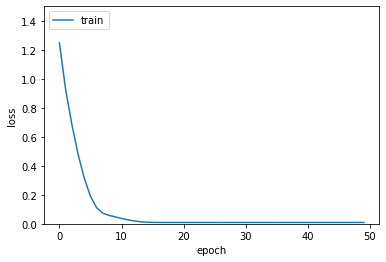

In [51]:
# 5. 학습과정 살펴보기

plt.plot(hist.history['loss'])
plt.ylim(0.0, 1.5)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [52]:
# 6. 모델 평가하기

loss = model.evaluate(x_test, y_test, batch_size=32)
print('loss : ' + str(loss))

4/4 [==============================] - 0s 1ms/step - loss: 0.0105
loss : 0.010505198501050472


#### 4) 깊은 다층퍼셉트론 신경망 모델

In [27]:
# 만드려는 모델

# model = Sequential()
# model.add(Dense(64, input_dim=1, activation='relu'))
# model.add(Dense(64, activation='relu'))
# model.add(Dese(1))

In [54]:
# 2. 모델 구성하기

model = Sequential()
model.add(Dense(64, input_dim=1, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

In [55]:
# 3. 모델 학습과정 설정하기

model.compile(optimizer='rmsprop', loss='mse')

In [56]:
# 4. 모델 학습시키기

hist = model.fit(x_train, y_train, epochs=50, batch_size=64)

Epoch 1/50
16/16 [==============================] - 0s 2ms/step - loss: 0.9296
Epoch 2/50
16/16 [==============================] - 0s 2ms/step - loss: 0.2686
Epoch 3/50
16/16 [==============================] - 0s 1ms/step - loss: 0.0588
Epoch 4/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0316
Epoch 5/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0201
Epoch 6/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0122
Epoch 7/50
16/16 [==============================] - 0s 1ms/step - loss: 0.0099
Epoch 8/50
16/16 [==============================] - 0s 1ms/step - loss: 0.0094
Epoch 9/50
16/16 [==============================] - 0s 1ms/step - loss: 0.0096
Epoch 10/50
16/16 [==============================] - 0s 1ms/step - loss: 0.0093
Epoch 11/50
16/16 [==============================] - 0s 1ms/step - loss: 0.0095
Epoch 12/50
16/16 [==============================] - 0s 1ms/step - loss: 0.0094
Epoch 13/50
16/16 [==============================

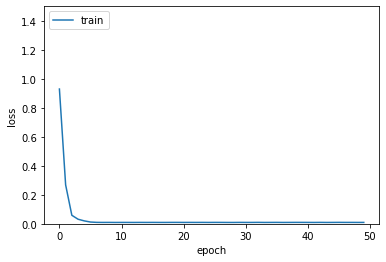

In [57]:
# 5. 학습과정 살펴보기

plt.plot(hist.history['loss'])
plt.ylim(0.0, 1.5)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [58]:
# 6. 모델 평가하기

loss = model.evaluate(x_test, y_test, batch_size=32)
print('loss : ' + str(loss))

4/4 [==============================] - 0s 2ms/step - loss: 0.0112
loss : 0.011229552328586578
